## Georules : Deep Marine-Lobes
This Package is used to build 3d models of deep marine lobes using rule-based models.

### I. Getting Started
1. Dowload repository from : https://github.com/chaconnb/georules
2. Follow the README to activate the georules environment and package.

### II. Load the required libraries 
The following code loads the required libraries.

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.lines import Line2D
from collections import Counter

from georules.S_ProbMap import Lobe_map
from georules.variance_bathymetry import varinace_bathymetry_maps
from georules.utils import save_bath_as_array
from georules.S_3Dgrid_healing import sandbox
from georules.visualization.V_grid import grid
from georules.visualization.visualization_utils import angle_between
from georules.visualization.visualization_utils import lobe_max_thickness
from georules.utils import load_list_json
from georules.utils import load_array
from georules.utils import save_bath_as_array
from georules.utils import save_list_as_json
from georules.utils import save_centroids
from georules.utils import save_array

import warnings
warnings.filterwarnings('ignore')


### II. Simulation
The following code runs simulations to create different 3d deepmarine-lobe models.

### II.I. User input Parameters:

- The following parameters need to be input by the user:  <br>

    * **nx** : (int) Sandbox size in the x direction.  <br>

    * **ny** : (int) Sandbox size in the y direction.  <br>

    * **cell_size** : (int)  Size of each cell in m. <br>

    * **width** : (int) Maximum lobe width in m.  <br>
    
    * **lenght** : (int) Maximum lobe lenght in m.  <br>

    * **tmax** : (int)  Maximum height of lome in m.  <br> 

    * **num_of_lobes** : (int)  Number of lobes to deposit.  <br>

    * **transition_matrix** : (np.array) Transition matrix for Markov chain.  <br>

    * **startstate** : (string)  Starting state for generating Markov chain.  <br>

    * **quadrant angles** : (dictionary) A dictionary with keys representing Markov states and values containing a list of angles indicating the starting and ending points for each key.  <br>

    * **source** : (list)  Coordinate where the source of sediment (channel) is located in the sandbox.  <br>

    * **cellsize_z**: (int) Size of each cell on the z-axis.  <br>

    * **n_mud**: (int)  Maximum number of mud cells that will be input into the sandbox at the 'HF' Markov state.  <br>

    * **states**: (list with strings) List of Markov states.  <br>

    * **n_test**: (int) Number of 3d models being built.  <br>

    + **global_property**: (float) Total percentage in decimal of propetry the facies are modelling.

In [2]:
#Parameter Settings

#Reservoir Parameters

_transition_matrix  = np.array([
        [0.1,0.13,0.3,0.15,0.22,0.1],
        [0.3,0.05,0.3,0.15,0.15,0.05],
        [0.3,0.13,0.1,0.15,0.18,0.14],
        [0.25,0.1,0.25,0.09,0.22,0.09],
        [0.05,0.25,0.25,0.25,0.05,0.15],
        [0.15,0.25,0.25,0.25,0.05,0.05], 
    ])

inpt_lobmaps = {
    "width": 15000,      # meters
    "tmax": 2,          # meters 
    "lenght" : 30000,   # meters  
    "num_of_lobes" : 10,       # number of lobes
    "cell_size" : 100,   #cell size
    "nx" : 250,
    "ny" : 250,  
    "transition_matrix" : _transition_matrix,   # transition matrix
    "startstate" : "Q2",              # start states can be ["Q1","Q2","Q3","Q4","NMA","HF"]
    "quadrant_angles" : {              # lists of quadrants with their angles
        "Q1": [315, 45],
        "Q2": [45, 135],
        "Q3": [135, 225],
        "Q4": [225, 315]
        }, 
    "source": [25, 200],    #source of the sediment (channel)
    "cellsize_z": 0.15,
    "n_mud": 2,            #number of cells mud that covers lobe
    "states": ['Q1', 'Q2', 'Q3', 'Q4', 'NMA', 'HF']
} 

#number of simulations

n_test = 20

#input 3D-visualization

global_property = 0.15
mud_property = 0.18


### II.II Run Simulations
Run n_test number of simulations. Output will be store in the **results** folder. Each simulation is a new 3d model.

In [3]:
n = 0

while n < n_test:
        
    result = Lobe_map(**inpt_lobmaps)
    
    (
        Bathymetry_maps,
        centroids,
        prob_maps,
        quadrants,
        angle_stack,
        columns_corner,
        rows_corner,
        lobe_image
    ) = result
           
    
    ##Calculates Variance of thicknesses in bathymetry maps
    variance_thickness = varinace_bathymetry_maps(Bathymetry_maps)
        
    save_array("variance_thickness{}".format(n),"results/surface_variance/",variance_thickness)
        
    #Turn list of bathymetry maps to arrays and save array to a file
    save_bath_as_array("bathy_array{}".format(n),"results/3d_grid_inputs/", Bathymetry_maps)
        
    #save centroids
    save_centroids("centroids{}".format(n),"results/centroids/", centroids)
        
    #Save lists as json files
    save_list_as_json("angle_stack{}".format(n),"results/3d_grid_inputs/", angle_stack)
    save_list_as_json("columns_corner{}".format(n),"results/3d_grid_inputs/", columns_corner)
    save_list_as_json("rows_corner{}".format(n),"results/3d_grid_inputs/", rows_corner)
    save_list_as_json("quadrants{}".format(n),"results/3d_grid_inputs/", quadrants)
        
    n = n + 1
    print("Simulation:",n) #Track Progress
        

Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
Simulation: 20


### III. Results Visualizations
The following code creates visualizations of the statistics generated by the simulations and visualizes the models in 3D.  <br>
* **Visualization Statistics Plots:** <br>
    
    - **Lag Angle plot** : Visualization of the lag angle, in a rose diagram. Lag angle refers to the azimuth angle created by the plane formed by $centroid_{n}$ to $centroid_{n+1}$. This angle describes the movement from $lobe_{n}$ to $lobe_{n+1}$.
    - **Frequency Markov States** :  Bar plot showing the percentage frequencies of Markov states generated for each simulation.
    - **Surface Variance** : Graph showing thickness variances in each bathymetry map for every simulation.
    - **Thickness of lobes** : Box plot showing the biggest thickness for the new lobe in each bathymetry map for every simulation.

* **3D Visualizations:**

### III.I Load Data
Load the data generated in section II.II.


In [4]:
#list with quadrants (Markov State) for every realiz
total_quadrants = []
# list with centroids for every simulation
total_centroids = []
# list with surface variance for every simulation
total_variance = []
#list with bathymetry maps for every simulation
total_bathymetry_maps = []
#list with angle stack for every simulation
total_angle_stack = []
#list with column corners for every simulation
total_column_corner = []
#list with column corners for every simulation
total_row_corner = []


for n in range(0,n_test):
    
    total_quadrants.append(load_list_json("quadrants{}".format(n),'results/3d_grid_inputs/'))
    total_centroids.append(load_array("centroids{}".format(n),'results/centroids/'))
    total_variance.append(load_array("variance_thickness{}".format(n),"results/surface_variance/"))
    total_bathymetry_maps.append(load_array("bathy_array{}".format(n),'results/3d_grid_inputs/'))
    total_angle_stack.append(load_list_json("angle_stack{}".format(n),'results/3d_grid_inputs/'))
    total_column_corner.append(load_list_json("columns_corner{}".format(n),'results/3d_grid_inputs/'))
    total_row_corner.append(load_list_json("rows_corner{}".format(n),'results/3d_grid_inputs/'))

### III.II Data Pre-Processing
Process uploaded data to generate visualizations.

#### III.II.I Lag Angle Plot

In [5]:
# Find the angles at which centroids move.
angles = []

for n in range(0,n_test): 
    centroids = total_centroids[n]

    #Remove rows containing "nan" values
    # Find rows that do not contain NaN values
    valid_rows = ~np.isnan(centroids).any(axis=1)

    # Use boolean indexing to select rows without NaN
    centroids = centroids[valid_rows]

    # Find the angle between three points - the reference point is grid center
    for i in range(len(centroids)-1):
        a = centroids[i]
        b = centroids[i+1]
        start_coordinate = np.array([0,a[1]])
        angles.append(angle_between(a, start_coordinate,b))

theta = np.linspace(0,360,37)

# Create pais in the theta using list comprehension
theta_pairlist = [[theta[i], theta[i + 1]] for i in range(0, len(theta)-1)]

# #Convert lists to numpy arrays for easier manipulation
angles_array = np.array(angles)
intervals_array = np.array(theta_pairlist)

# #Initialize a list to store the count of angles in each interval
angle_counts = [] 

for interval in intervals_array:
    # Filter angles within the current interval
    filtered_angles = angles_array[(angles_array >= interval[0]) & (angles_array < interval[1])]

    # Count the number of angles in the interval
    count = len(filtered_angles)

    # Store the count in the list
    angle_counts.append(count)


# #calculate the mean of each pair to be able to plot it 
pairlist_mean = [int(sum(pair) / len(pair)) for pair in theta_pairlist]

#transform the pairlist_mean from degrees to radians
pairlist_mean = np.radians(pairlist_mean)

#transform angle_counts from list to an array
angle_counts = np.array(angle_counts)

#### III.II.II Frequency of Markov-States Plot

In [6]:
#combine the lists of quadrants
flattened_quadrants_list = [item for sublist in total_quadrants for item in sublist]

# Calculate the frequency of each quadrant
frequency_counter = Counter(flattened_quadrants_list)

# Extract the quadrants and their frequencies
quadrants = list(frequency_counter.keys())
frequencies = list(frequency_counter.values())

#Calculate percentages from frequencies
frequencies_percentage = [ i * 100/sum(frequencies) for i in frequencies]

#### III.III.III Surface Varaince Plot

In [7]:
#create array of zeros to store the variances of the bathymetry maps
#Add four columns to the array to accommodate space for p10, p25, p85, and p90 values for each row.
#Add one row, as there are n_lobes + 1 bathymetry maps, with the first one being just an array of zeros.
array_variances_percentiles = np.zeros((inpt_lobmaps["num_of_lobes"]+1,n_test+5))

for n in range(0,n_test): 

    variance_bathymetry = total_variance[n]
    array_variances_percentiles[:,n] = variance_bathymetry


#Find P10, P25, P85 and P90

for n in range(inpt_lobmaps["num_of_lobes"]+1):
    #p10
    array_variances_percentiles[n,n_test] = np.percentile(array_variances_percentiles[n,:n_test],10)
    #p25
    array_variances_percentiles[n,n_test+1] = np.percentile(array_variances_percentiles[n,:n_test],25)
    #p50
    array_variances_percentiles[n,n_test+2] = np.percentile(array_variances_percentiles[n,:n_test],50)
    #p75
    array_variances_percentiles[n,n_test+3] = np.percentile(array_variances_percentiles[n,:n_test],75)
    #p90
    array_variances_percentiles[n,n_test+4] = np.percentile(array_variances_percentiles[n,:n_test],90)

#### III.III.IV Thickness box-plot

In [8]:
#array for saving max thickness for each lobe on each simulation
lobe_thickness_realizations = np.zeros((inpt_lobmaps["num_of_lobes"], n_test))

#Data prep
for n in range(0,n_test):
    #Load quadrants for each simulation
    output_quadrants = total_quadrants[n]
    #Load bathymetry maps
    bathymetry_array = total_bathymetry_maps[n]
    #Remove the first bathymetry map from the bathymetry array as it doesn't contain any lobes (only zeros).
    bathymetry_array = bathymetry_array[1:len(bathymetry_array),:,:]


    for i in range(len(output_quadrants)): 
        if output_quadrants[i] != "HF":
            if i == 0:
                lobe_thickness_realizations[i,n-1] = np.max(bathymetry_array[0,:,:])
            else:
                lobe_thickness_realizations[i,n-1] = lobe_max_thickness(bathymetry_array[i-1,:,:],bathymetry_array[i,:,:])


# Replace zeros with the mean of each column (lobe)
lobe_thickness_nan = np.where(lobe_thickness_realizations == 0, np.nan, lobe_thickness_realizations)
# Calculate the mean of each column excluding NaN values
col_means = np.nanmean(lobe_thickness_nan, axis=0)
# Replace zeros with the mean of each column
lobe_thickness_no_zeros = np.where(lobe_thickness_realizations == 0, col_means, lobe_thickness_realizations)


# #create a list of lists with the thickneses for the  n_lobes for the n_test simulations.
lobe_thickness_list = [row.tolist() for row in lobe_thickness_no_zeros]

### III.III Plot Statistics Visualization

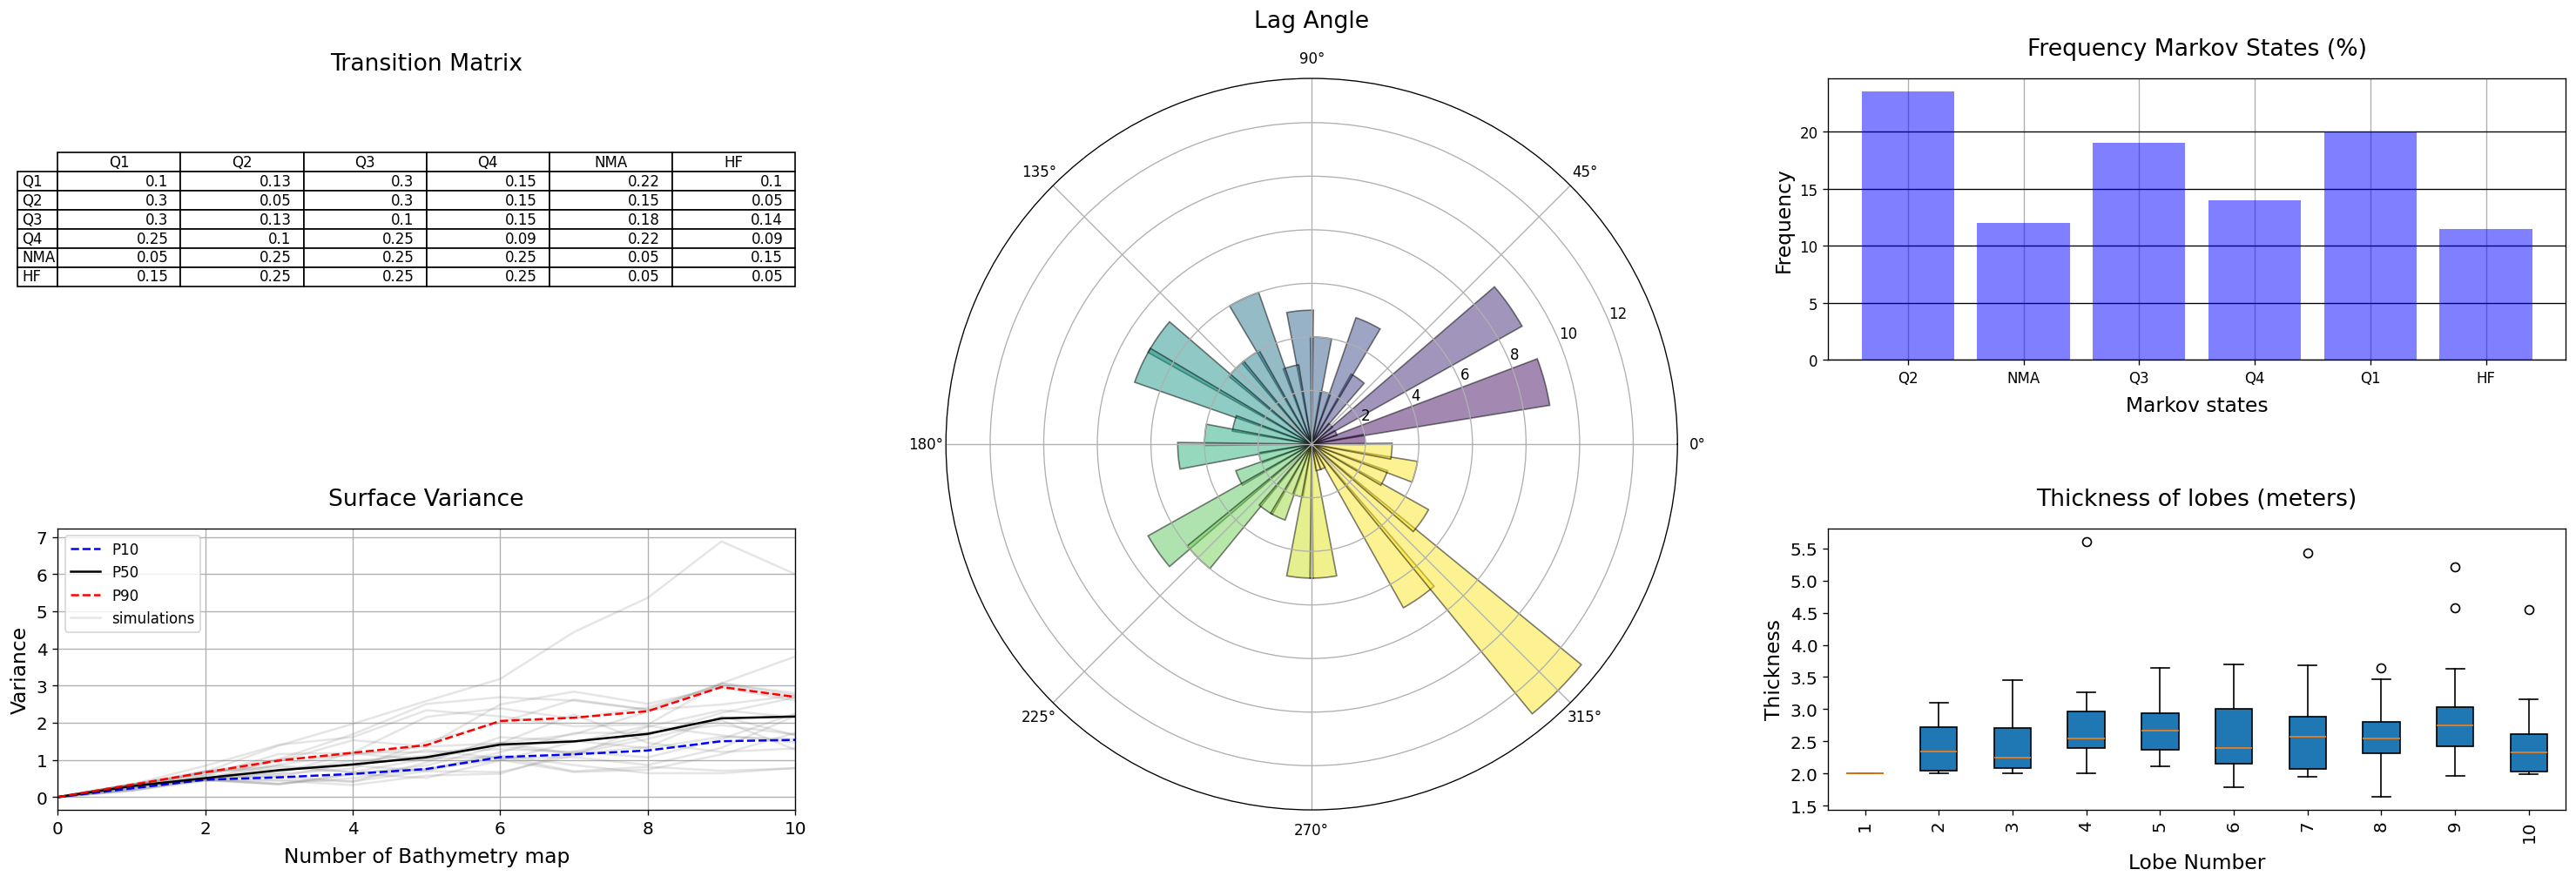

In [10]:
fig = plt.figure(figsize=(12, 7),dpi=120)
grid_spec = gridspec.GridSpec(ncols = 3,nrows=2,width_ratios=[2, 2, 2])

ax0 = fig.add_subplot(grid_spec[0])
ax0.axis('tight')
ax0.axis('off')
the_table = ax0.table(cellText=_transition_matrix,rowLabels=inpt_lobmaps["states"],colLabels=inpt_lobmaps["states"],loc='center')
plt.title('Transition Matrix', fontsize=16)

ax1 = fig.add_subplot(grid_spec[1])
ax1.axis('off')
# Plot polar bar graph
# Get an axes handle/object
ax1 = plt.subplot(projection ="polar")
# Plot
bars = ax1.bar(x = pairlist_mean, height= angle_counts,
        color=plt.cm.viridis(pairlist_mean/ 5.),
        width=0.2,
        bottom=0.0,
        alpha=0.5,
        edgecolor='k')
# Additional Tweaks
plt.grid(True)
plt.title("Lag Angle", fontsize=16, pad=16)

ax2= fig.add_subplot(grid_spec[2])
# Plot the bar graph
plt.grid()
plt.bar(quadrants, frequencies_percentage, color='blue', zorder=2,alpha =0.5)
# Plot the grid with a lower zorder value
plt.grid(axis='y', zorder=1,color ='black')
plt.xlabel('Markov states',fontsize=14,labelpad=7)
plt.ylabel('Frequency',fontsize=14)
plt.title('Frequency Markov States (%)', fontsize=16, pad=16)

### Surface Variance
##### plot variance vs surface and percentiles
ax3 = fig.add_subplot(grid_spec[3])

bathy_lenght = list(range(0,inpt_lobmaps["num_of_lobes"]+1))
for n in range(n_test):

    # # set the title of a plot 
    plt.title("Surface Variance", fontsize=16, pad=16)

    # # plot scatter plot with x and y data 
    plt.plot(bathy_lenght,array_variances_percentiles[:,n],alpha=0.2,color ="gray") 
#label different realizations
line = Line2D([0], [0], label='simulations', color='gray',alpha =0.2)

plt.plot(bathy_lenght,array_variances_percentiles[:,n_test+1],"b--", label = 'P10') #p10
plt.plot(bathy_lenght,array_variances_percentiles[:,n_test+2],"k", label = 'P50') #p50
plt.plot(bathy_lenght,array_variances_percentiles[:,n_test+3],"r--", label = 'P90') #p90 

plt.xlim([0, inpt_lobmaps["num_of_lobes"]]) 
plt.xlabel('Number of Bathymetry map',fontsize=14,labelpad=7)
plt.ylabel('Variance',fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
#legend
handles, labels = ax3.get_legend_handles_labels()
handles.append(line)
plt.legend(handles=handles)


### Lobe thickness
ax5 = fig.add_subplot(grid_spec[5])
labels = list(map(str, range(1, inpt_lobmaps["num_of_lobes"]+1)))

#boxplot
plt.boxplot(lobe_thickness_list, vert=True, patch_artist=True, labels=labels) 
plt.ylabel('Thickness',fontsize=14)
plt.xlabel('Lobe Number',fontsize=14,labelpad=7)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Thickness of lobes (meters)", fontsize=16, pad=16)



plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.6); plt.show()

### III. Visualizations: 3D models

In [11]:
display_model = 3 #Choose simulation/model to be displayed.

In [14]:
bathymetry_map = total_bathymetry_maps[display_model]
nz = math.ceil(np.max(bathymetry_map[len(bathymetry_map)-1])) + 5 #Find maximum height 

#input sandboxgrid function
inpt_sandbox = {
    "lobe_length": inpt_lobmaps["lenght"],
    "lobe_wmax": inpt_lobmaps["width"],
    "cell_size ": inpt_lobmaps["cell_size"],
    "lobe_image": lobe_image,
    "cellsize_z": inpt_lobmaps["cellsize_z"], 
    "lobe_tmax ": inpt_lobmaps["tmax"],
    "global_prop": global_property,
    "mud_property": mud_property,
    "a1": 0.66,
    "a2": 0.33,
    "nx": inpt_lobmaps["nx"],
    "ny": inpt_lobmaps["ny"],
    "nz": nz,
    "n_lobe": inpt_lobmaps["num_of_lobes"],
    "angle_stack": total_angle_stack[display_model],       # list of lobe apices with respect to the source
    "columns_corner": total_column_corner[display_model],  # list of the locations of the top-left corners of the lobe images for
                                                            # each lobe with respect to the bathymetry map.
    "rows_corner": total_row_corner[display_model],   # list of the locations of the top-left rows of the lobe images for
                                                      # each lobe w.r.t. the bathymetry map. 
    "Bathymetry_maps": bathymetry_map 
} 


In [15]:
sandbox_grid = sandbox(**inpt_sandbox)

TypeError: sandbox() got an unexpected keyword argument 'cell_size '

In [ ]:
# # ## Create 3D Grid  
    
# nz = math.ceil(np.max(Bathymetry_maps[len(Bathymetry_maps)-1])) + 5 #Find maximum height 
# sandbox_grid = sandbox(lenght[0],wmax[0],cellsize[0],lobe_image,cellsize_z[0],tmax[0],gp[0],mud_property[0],
# n_mud[0],a1[0],a2[0],nx[0],ny[0],nz,lobes[0],angle_stack,columns_corner,rows_corner,Bathymetry_maps,quadrants)

### Visualize 
# grid(sandbox_grid,1,1,1,plot_slices=True, slice_x=40, slice_y=30, slice_z=2) #change depending on desired type of visualization 
    